In [ ]:
import pickle
import gzip
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Varia

**IN PROGRESS, come back here after some time**

In this chapter we will look into different architectures and saliency.

## Transfer Learning

Since lower level features in networks for image tasks turn out to be quite basic we can transfer this knowledge to new datasets by training only later layers.

<img width=50% src="https://miro.medium.com/max/1000/1*LUFUl_8fqS97nUzpcFjgWw.png">

In [ ]:
# TODO

## Saliency

**TODO: add writeup...**

Gradients can be calculated in TensorFlow using GradientTape, for example:

```python
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
    y = x**2
tape.gradient(y, x)
```

will calculate $\frac{dy}{dx}$ at point $3$, thus yielding $6$.

In [90]:
def saliency(model, single_input):
    single_input = tf.convert_to_tensor(single_input, dtype=tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(single_input)
        predictions = model(single_input)
        winning_class = tf.argmax(predictions, axis=1)[0]
        output = predictions[:, winning_class]

    # Gradients of the loss with respect to the input
    gradient = tape.gradient(output, single_input)

    return np.abs(gradient)

To test this out let's make a simple dataset where *y* is averate of first two columns and third column is not used.

In [93]:
X = np.random.normal(size=(1000, 3))
y = (X[:, 0] + X[:, 1]) / 2

Now let's fit simple regression NN and look at salience.

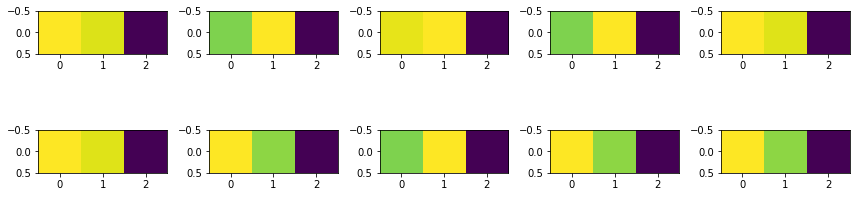

In [94]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(loss='mse')

model.fit(X, y, epochs=30, verbose=0)

plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(saliency(model, X[[i]]))

plt.tight_layout()
plt.show()

Nice, nearly all value comes from first two features, exactly as expected. If you will increase epoch count and overfit train data weights should even up (try that).

**TASK:** take your own flatland model and visualize salience.

## Architectures

There are a lot of possible architectures, we have only touched the surface. Take a glympse at the variations of Neural Networks [here](https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464).

<img src="https://miro.medium.com/max/2000/1*cuTSPlTq0a_327iTPJyD-Q.png" style="width: 80%"/>

Interesting fact: using Autoencoders we can easily replicate SVD and PCA! We will try this out in the lecture.

### Autoencoders

### Word2Vec